In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [35]:
data = pd.read_csv("Wholesale customers data.csv")

In [36]:
print("Размерность датасета:", data.shape)
print("\nТипы признаков:\n", data.dtypes)
print("\nКоличество пропусков:\n", data.isna().sum())

display(data.head())

Размерность датасета: (440, 8)

Типы признаков:
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Количество пропусков:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [37]:
numeric_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
desc = data[numeric_cols].describe()
display(desc)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


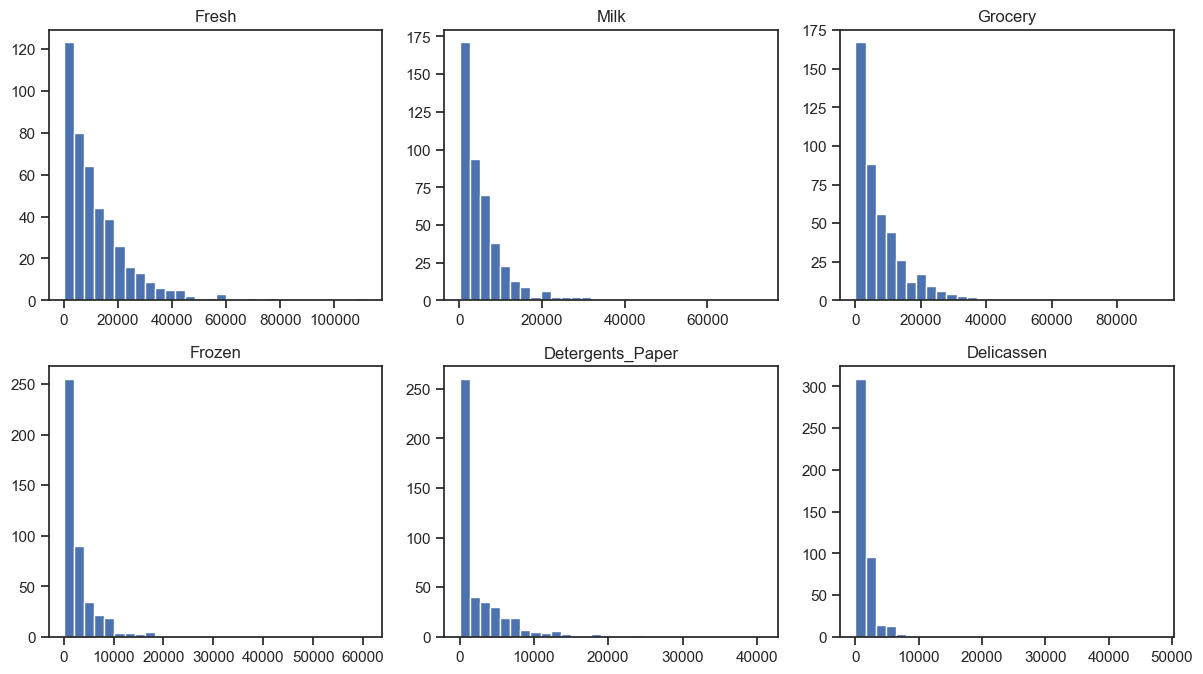

In [38]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[col], bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
for col in numeric_cols:
    stat, p = stats.shapiro(data[col])
    print(f"{col}: p-value={p:.5f}")

print("\nЗамечание: p < 0.05 означает отклонение от нормального распределения.")

Fresh: p-value=0.00000
Milk: p-value=0.00000
Grocery: p-value=0.00000
Frozen: p-value=0.00000
Detergents_Paper: p-value=0.00000
Delicassen: p-value=0.00000

Замечание: p < 0.05 означает отклонение от нормального распределения.


In [40]:
# 7.1 χ²-тест для категориального Channel
X = data[numeric_cols]
y_channel = data['Channel']

# χ² требует неотрицательных значений
X_chi = MinMaxScaler().fit_transform(X)

chi_scores, p_values = chi2(X_chi, y_channel)
print("\nCHI² значимость признаков относительно Channel:")
for col, chi, p in zip(numeric_cols, chi_scores, p_values):
    print(f"{col}: chi2={chi:.4f}, p={p:.6f}")

# 7.2 ANOVA для Region (3 категории)
y_region = data['Region']
print("\nANOVA F-test для Region:")
for col in numeric_cols:
    groups = [data[data['Region']==r][col] for r in data['Region'].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{col}: F={f_stat:.4f}, p={p_val:.6f}")


CHI² значимость признаков относительно Channel:
Fresh: chi2=1.4936, p=0.221653
Milk: chi2=12.0376, p=0.000521
Grocery: chi2=19.9263, p=0.000008
Frozen: chi2=2.2783, p=0.131199
Detergents_Paper: chi2=34.3542, p=0.000000
Delicassen: chi2=0.1501, p=0.698409

ANOVA F-test для Region:
Fresh: F=1.1315, p=0.323483
Milk: F=0.3779, p=0.685493
Grocery: F=0.5502, p=0.577239
Frozen: F=1.0622, p=0.346580
Detergents_Paper: F=0.7889, p=0.454993
Delicassen: F=0.7150, p=0.489753



Колонки с категориями: []


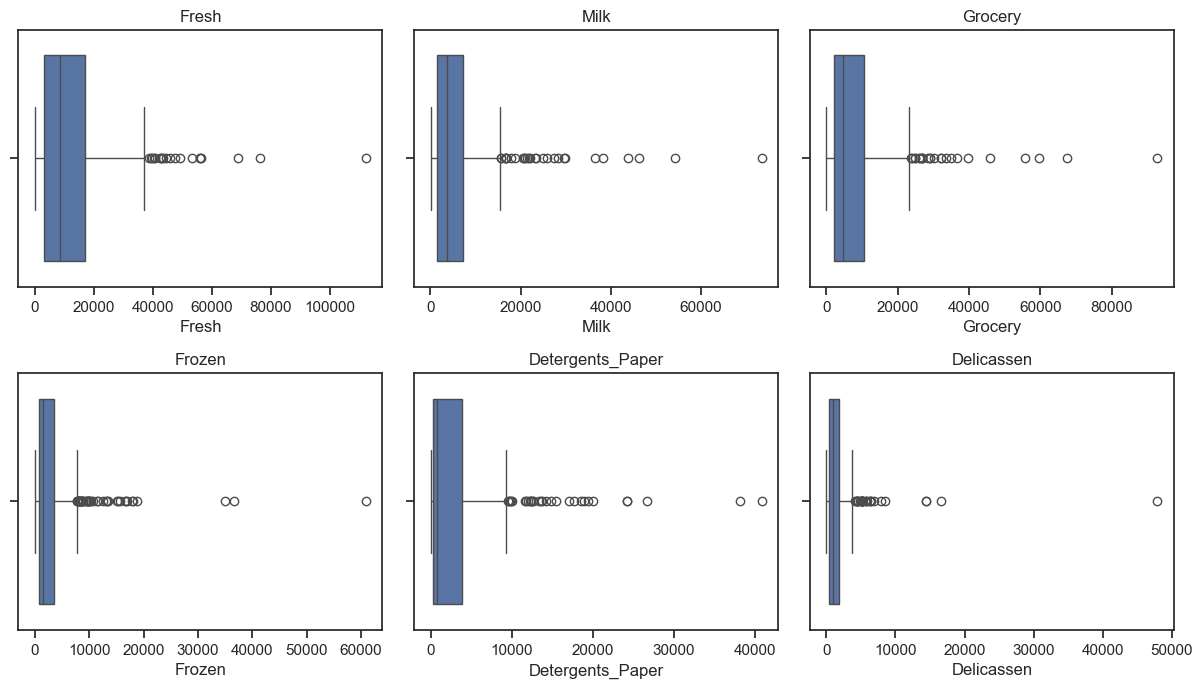


Количество выбросов по каждому признаку (|z|>3):
Fresh               43
Milk                43
Grocery             43
Frozen              43
Detergents_Paper    43
Delicassen          43
dtype: int64


In [41]:
# 8.1 Проверка отсутствие классов
print("\nКолонки с категориями:", data.select_dtypes('object').columns.tolist())

# 8.2 Проверка выбросов (boxplot)
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 8.3 Детекция выбросов через Z-score
z_scores = np.abs(stats.zscore(data[numeric_cols]))
outliers = (z_scores > 3).sum()
print("\nКоличество выбросов по каждому признаку (|z|>3):")
print(pd.Series(outliers, index=numeric_cols))

In [42]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])
data_scaled = pd.DataFrame(data_scaled, columns=numeric_cols)

print("\nДанные готовы для кластеризации (масштабированы).")
display(data_scaled.head())


Данные готовы для кластеризации (масштабированы).


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


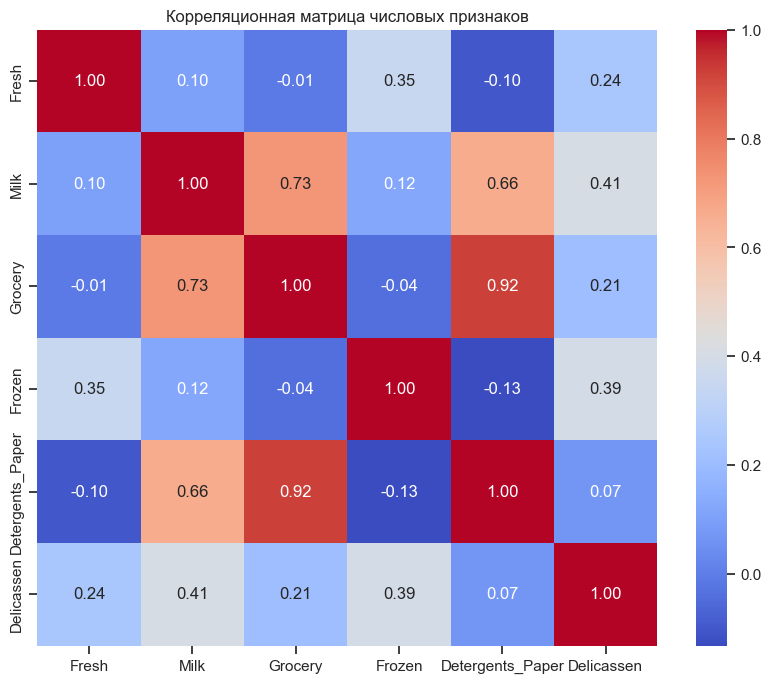


Высококоррелированные пары (>|0.85|):
Grocery — Detergents_Paper, corr=0.925
Detergents_Paper — Grocery, corr=0.925


In [43]:
# ------------ 10. Тепловая карта корреляций ------------

plt.figure(figsize=(10, 8))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица числовых признаков")
plt.show()

# ------------ 11. Проверка мультиколлинеарности ------------

# Порог для мультиколлинеарности (можно изменить)
threshold = 0.85  

# Найдём пары признаков с высокой корреляцией
high_corr_pairs = []
for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold:
            high_corr_pairs.append((col1, col2, corr_matrix.loc[col1, col2]))

print("\nВысококоррелированные пары (>|0.85|):")
for p in high_corr_pairs:
    print(f"{p[0]} — {p[1]}, corr={p[2]:.3f}")


Признаки после удаления Detergents_Paper:
['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']


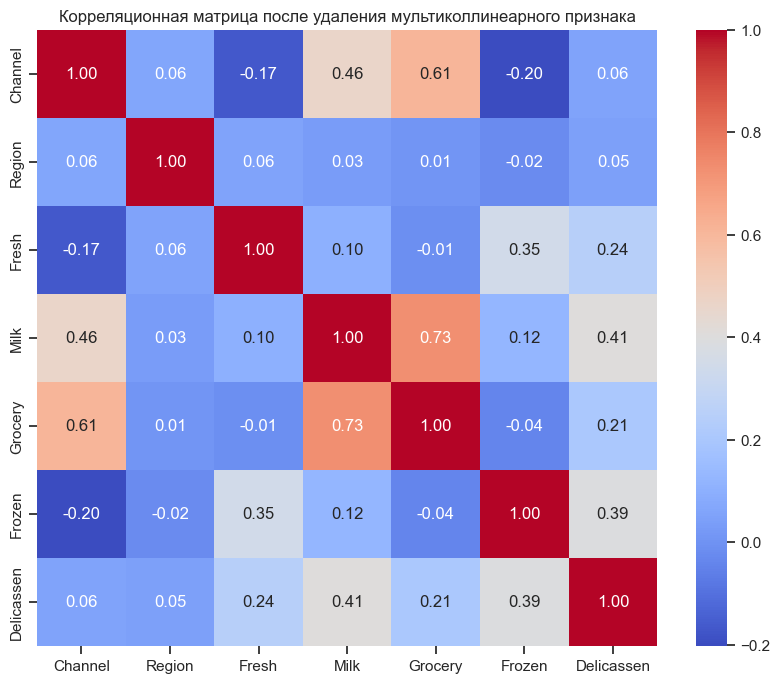

In [44]:
# Удаляем признак Detergents_Paper как высококоррелированный с Grocery
data_reduced = data.drop(columns=["Detergents_Paper"])

print("Признаки после удаления Detergents_Paper:")
print(data_reduced.columns.tolist())

# Проверим новую корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(data_reduced.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица после удаления мультиколлинеарного признака")
plt.show()


In [45]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Fresh','Milk','Grocery','Frozen','Delicassen']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])

data_scaled = pd.DataFrame(data_scaled, columns=numeric_cols)

print("Первые строки стандартизированных данных:")
display(data_scaled.head())

Первые строки стандартизированных данных:


,Fresh,Milk,Grocery,Frozen,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,1.299347


<Figure size 1200x1000 with 0 Axes>

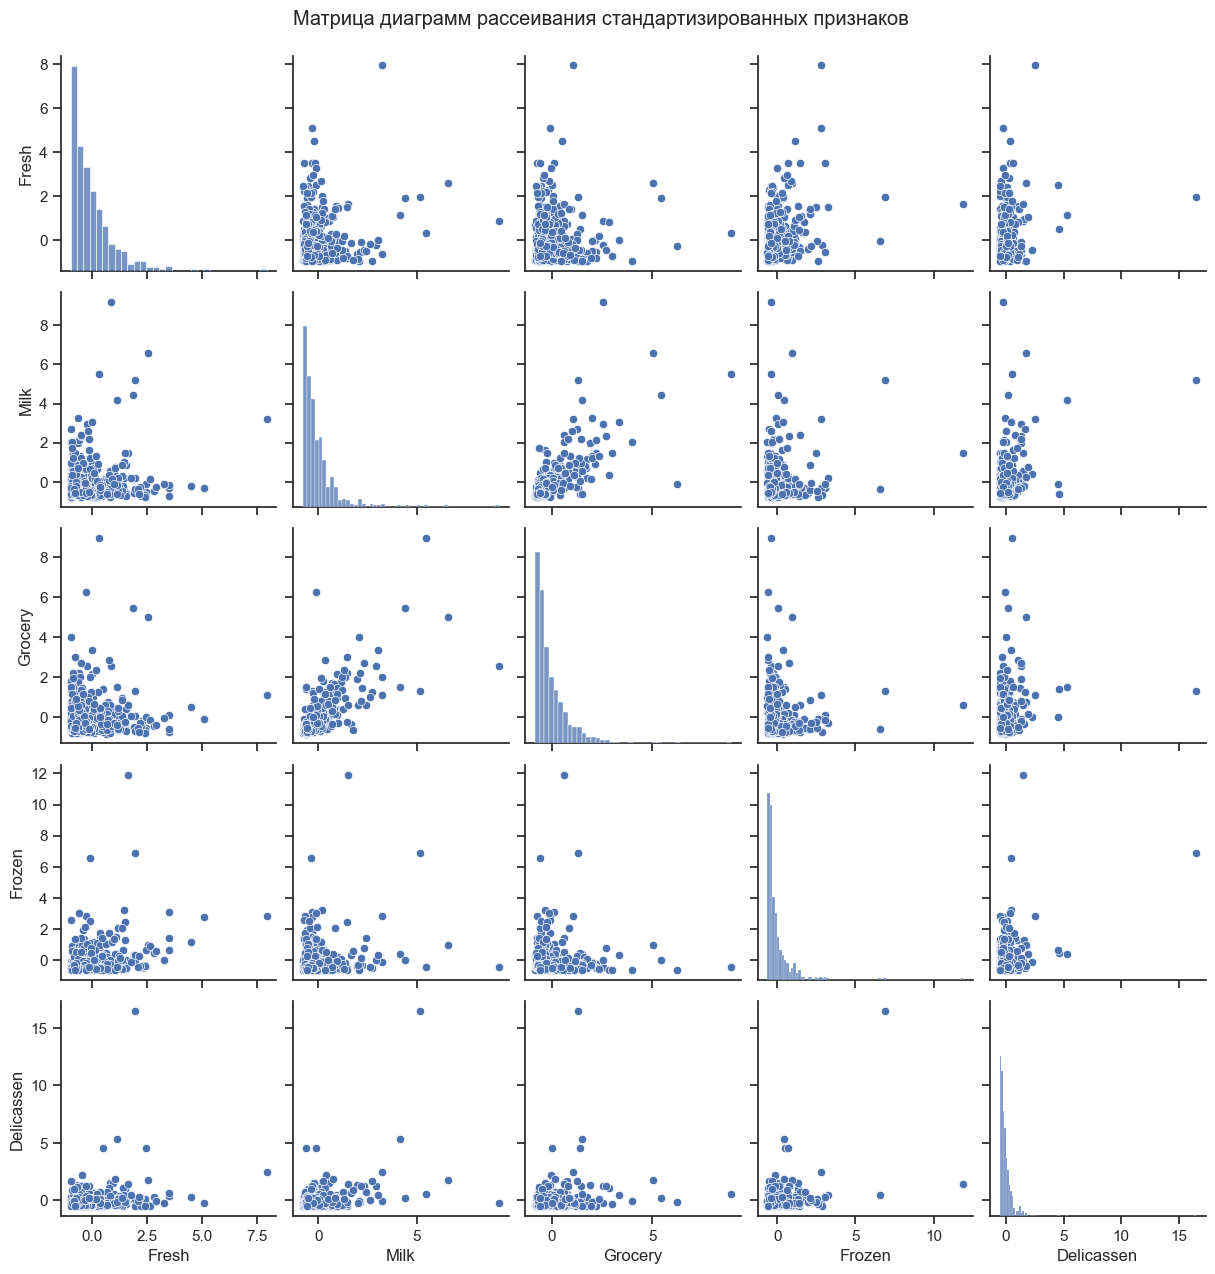

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

plt.figure(figsize=(12, 10))
scatter = sns.pairplot(data_scaled, diag_kind="hist")
plt.suptitle("Матрица диаграмм рассеивания стандартизированных признаков", y=1.02)
plt.show()

Количество выбросов: 24
Размерность после удаления выбросов: (416, 8)
Первые строки стандартизированных данных без выбросов:


,Fresh,Milk,Grocery,Frozen,Delicassen
0,0.201488,0.985150,0.093115,-0.805750,0.065492
1,-0.371949,1.017527,0.393580,-0.274447,0.418021
2,-0.443884,0.806868,0.111529,-0.053757,5.301918
3,0.262388,-0.793473,-0.406911,1.318777,0.427679
4,1.217777,0.092475,0.038771,0.464504,3.161793


<Figure size 1200x1000 with 0 Axes>

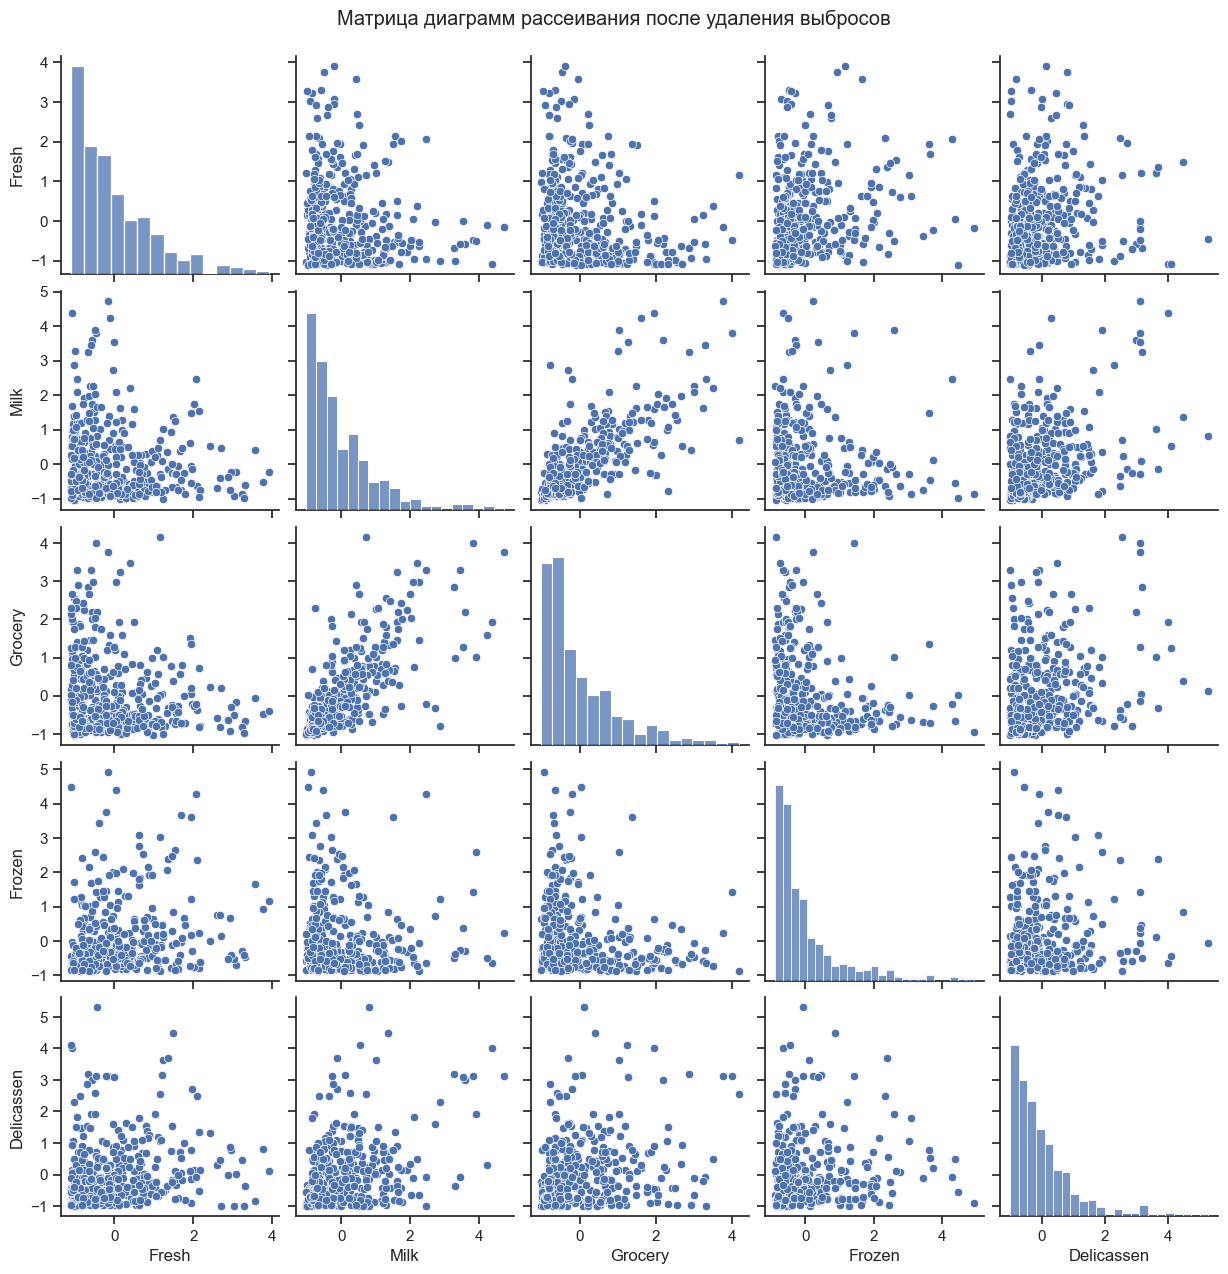

In [47]:
# ---------------- 1. Список числовых признаков после удаления мультиколлинеарности ----------------
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']

# ---------------- 2. Поиск и удаление выбросов по Z-score ----------------

from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data[numeric_cols]))
outliers = np.where(z_scores > 3)

# Строки, где есть хотя бы один выброс
rows_to_remove = np.unique(outliers[0])

print("Количество выбросов:", len(rows_to_remove))

# Удаление выбросов
data_no_outliers = data.drop(index=rows_to_remove).reset_index(drop=True)

print("Размерность после удаления выбросов:", data_no_outliers.shape)

# ---------------- 3. Стандартизация данных после удаления выбросов ----------------

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled_no_outliers = scaler.fit_transform(data_no_outliers[numeric_cols])
data_scaled_no_outliers = pd.DataFrame(data_scaled_no_outliers, columns=numeric_cols)

print("Первые строки стандартизированных данных без выбросов:")
display(data_scaled_no_outliers.head())

# ---------------- 4. Матрица диаграмм рассеивания ----------------

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

plt.figure(figsize=(12, 10))
scatter = sns.pairplot(data_scaled_no_outliers, diag_kind="hist")
plt.suptitle("Матрица диаграмм рассеивания после удаления выбросов", y=1.02)
plt.show()


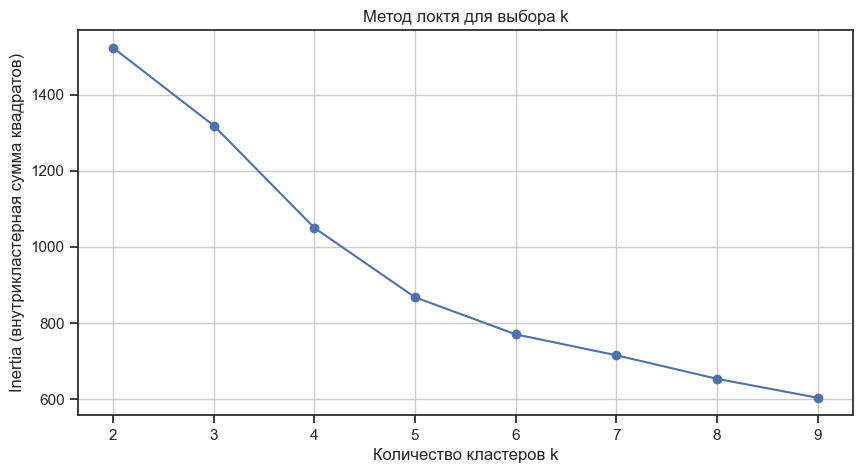

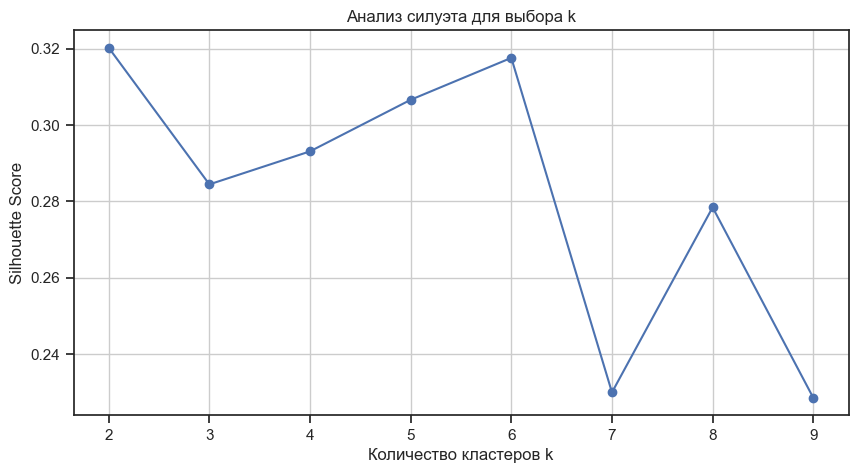

Лучший silhouette score: 0.3202522788100563
Оптимальное k: 2


In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = data_scaled_no_outliers

inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# ---------- Метод локтя ----------
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Метод локтя для выбора k")
plt.xlabel("Количество кластеров k")
plt.ylabel("Inertia (внутрикластерная сумма квадратов)")
plt.grid(True)
plt.show()

# ---------- Индекс силуэта ----------
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Анализ силуэта для выбора k")
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

print("Лучший silhouette score:", max(silhouette_scores))
print("Оптимальное k:", K_range[silhouette_scores.index(max(silhouette_scores))])


In [49]:
# На основании анализа выбираем оптимальное k
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print("Используем k =", optimal_k)

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X)

data_kmeans = X.copy()
data_kmeans['Cluster'] = labels_kmeans

display(data_kmeans.head())


Используем k = 2


,Fresh,Milk,Grocery,Frozen,Delicassen,Cluster
0,0.201488,0.985150,0.093115,-0.805750,0.065492,1
1,-0.371949,1.017527,0.393580,-0.274447,0.418021,1
2,-0.443884,0.806868,0.111529,-0.053757,5.301918,1
3,0.262388,-0.793473,-0.406911,1.318777,0.427679,0
4,1.217777,0.092475,0.038771,0.464504,3.161793,1


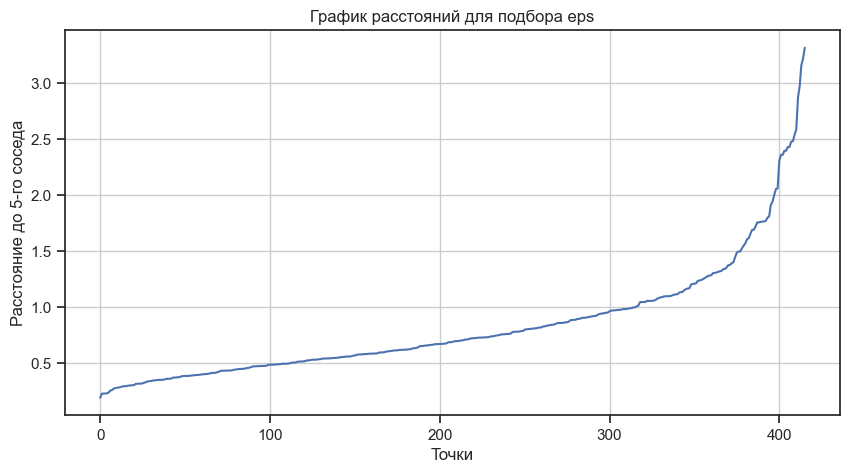

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# ---------- Подбор eps через график расстояний ----------
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:, 4])  # расстояние до 5-го соседа

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("График расстояний для подбора eps")
plt.xlabel("Точки")
plt.ylabel("Расстояние до 5-го соседа")
plt.grid(True)
plt.show()


In [68]:
eps_value = 1.5

dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

data_dbscan = X.copy()
data_dbscan['Cluster'] = labels_dbscan

print("Кластеры DBSCAN:", np.unique(labels_dbscan))
display(data_dbscan.head())


Кластеры DBSCAN: [-1  0]


,Fresh,Milk,Grocery,Frozen,Delicassen,Cluster
0,0.201488,0.985150,0.093115,-0.805750,0.065492,0
1,-0.371949,1.017527,0.393580,-0.274447,0.418021,0
2,-0.443884,0.806868,0.111529,-0.053757,5.301918,-1
3,0.262388,-0.793473,-0.406911,1.318777,0.427679,0
4,1.217777,0.092475,0.038771,0.464504,3.161793,-1


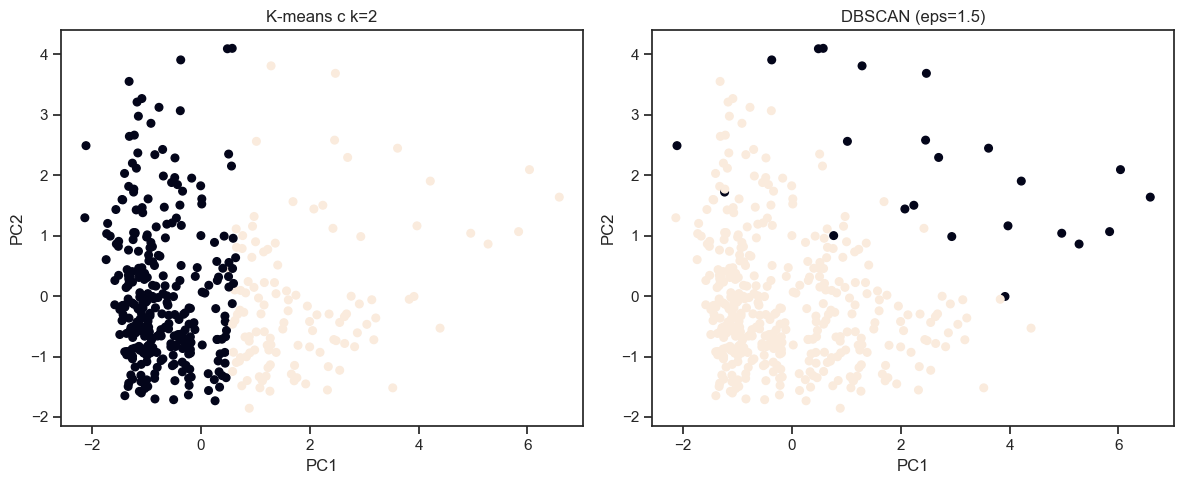

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))

# ---------- KMeans ----------
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, s=30)
plt.title(f"K-means с k={optimal_k}")
plt.xlabel("PC1")
plt.ylabel("PC2")

# ---------- DBSCAN ----------
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, s=30)
plt.title(f"DBSCAN (eps={eps_value})")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()


In [70]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = data_scaled_no_outliers

def internal_metrics(X, labels, method_name):
    print(f"\n=== Внутренние метрики для {method_name} ===")
    # Если менее 2 кластеров — метрики невозможны
    if len(set(labels)) <= 1:
        print("Недостаточно кластеров для расчёта метрик.")
        return
    
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)

    print("Silhouette Score:", sil)
    print("Calinski-Harabasz Index:", ch)
    print("Davies-Bouldin Index:", db)

# Метрики K-Means
internal_metrics(X, labels_kmeans, "K-Means")

# Метрики DBSCAN
internal_metrics(X, labels_dbscan, "DBSCAN")



=== Внутренние метрики для K-Means ===
Silhouette Score: 0.3202522788100563
Calinski-Harabasz Index: 151.17363000209266
Davies-Bouldin Index: 1.3796125211253605

=== Внутренние метрики для DBSCAN ===
Silhouette Score: 0.49282679404132107
Calinski-Harabasz Index: 66.54218670366058
Davies-Bouldin Index: 1.4192846729702275


In [71]:
import numpy as np
from scipy.spatial.distance import cdist

print("\n=== Компактность и расстояние между центрами кластеров (K-Means) ===")

centers = kmeans_final.cluster_centers_

# Межкластерные расстояния
center_distances = cdist(centers, centers)
print("\nМатрица расстояний между центрами кластеров:")
print(center_distances)

# Внутрикластерная компактность
compactness = []
for c in range(optimal_k):
    cluster_points = X[labels_kmeans == c]
    intradist = np.mean(cdist(cluster_points, [centers[c]]))
    compactness.append(intradist)

print("\nВнутрикластерная компактность (среднее расстояние до центра):")
for i, val in enumerate(compactness):
    print(f"Кластер {i}: {val}")



=== Компактность и расстояние между центрами кластеров (K-Means) ===

Матрица расстояний между центрами кластеров:
[[0.         2.57890763]
 [2.57890763 0.        ]]

Внутрикластерная компактность (среднее расстояние до центра):
Кластер 0: 1.5683039866060882
Кластер 1: 1.9895892655982266


In [72]:
print("\n=== Компактность кластеров DBSCAN ===")

unique_clusters = [c for c in np.unique(labels_dbscan) if c != -1]

for cluster in unique_clusters:
    cluster_points = X[labels_dbscan == cluster]
    centroid = np.median(cluster_points, axis=0)
    intradist = np.mean(cdist(cluster_points, [centroid]))
    print(f"Кластер {cluster}: компактность={intradist}, размер={len(cluster_points)}")

# Шум
noise_count = sum(labels_dbscan == -1)
print("\nКоличество шумовых точек DBSCAN:", noise_count)



=== Компактность кластеров DBSCAN ===
Кластер 0: компактность=1.791071296037038, размер=393

Количество шумовых точек DBSCAN: 23


In [73]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, jaccard_score

true_labels = data_no_outliers['Region'].values

print("\n=== Внешние метрики для K-Means ===")
print("Adjusted Rand Index:", adjusted_rand_score(true_labels, labels_kmeans))
print("AMI:", adjusted_mutual_info_score(true_labels, labels_kmeans))

# Jaccard требует бинарных меток, поэтому вычисляем усреднённый
print("Jaccard (macro):", jaccard_score(true_labels, labels_kmeans, average='macro'))



=== Внешние метрики для K-Means ===
Adjusted Rand Index: -0.010124378628948908
AMI: -0.0030026580775659776
Jaccard (macro): 0.02976190476190476


In [74]:
print("\n=== Внешние метрики для DBSCAN ===")
valid = labels_dbscan != -1

print("Adjusted Rand Index:", adjusted_rand_score(true_labels[valid], labels_dbscan[valid]))
print("AMI:", adjusted_mutual_info_score(true_labels[valid], labels_dbscan[valid]))



=== Внешние метрики для DBSCAN ===
Adjusted Rand Index: 0.0
AMI: 0.0
